# ANOVA

The following jupyter package is using the statistical method known as ANOVA to analyse a data set on diets.

1. data source for the ANOVA study https://www.sheffield.ac.uk/mash/statistics/datasets

2. Source for inforation on ANOVA https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

3. Paire t - test https://www.youtube.com/watch?v=DZyDbEzaiK0

The data set shown below contains infomation on 78 people using 1 of 3 diets.

|Variable name|Variable|Data type|
|:-|:-:|:-:|
|Person|Participant number|   |
|Gender|1=male;0=female|Binary|
|Age|Age(years)|Scale|
|Height|Height(cm)|Scale|
|preweight|Weight before the diet|Scale|
|Diet|Diet|Binary|
|Wight loss 6 weeks|weight loss (kg)|Scale|
|Weight lost after 6 weeks|weight lost (kg)|Scale|

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

plt.rcParams["figure.figsize"] =(10,6)

In [22]:
# eyball the data
df = pd.read_csv('Diet.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [ ]:
# after eyeballing the data we will drop the first 2 rows who appear to have not taken part in the study

In [33]:
remove = df["gender"] != " "
df = df[remove]

In [34]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [96]:
df['weight_lost'] = (df['pre.weight'] - df['weight6weeks'])

<ipython-input-96-28626946da39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight_lost'] = (df['pre.weight'] - df['weight6weeks'])


In [45]:
# ignoring the error above (it makes no difference)
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


In [46]:
dfdiet1 = df[df['Diet']==1]
dfdiet1.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
5,4,0,33,171,64,1,61.1,2.9
6,5,0,50,170,65,1,62.2,2.8


In [47]:
dfdiet2 = df[df['Diet']==2]
dfdiet2.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost
16,27,0,44,174,58,2,60.1,-2.1
17,28,0,37,172,58,2,56.0,2.0
18,29,0,41,165,59,2,57.3,1.7
19,30,0,43,171,61,2,56.7,4.3
20,31,0,20,169,62,2,55.0,7.0


In [48]:
dfdiet3 = df[df['Diet']==3]
dfdiet3.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_lost
30,52,0,51,165,60,3,53.0,7.0
31,53,0,35,169,62,3,56.4,5.6
32,54,0,21,159,64,3,60.6,3.4
33,55,0,22,169,65,3,58.2,6.8
34,56,0,36,160,66,3,58.2,7.8


In [ ]:
# Having a look at the distibutions of the weight lost on each diet using a histogram and kde plot.

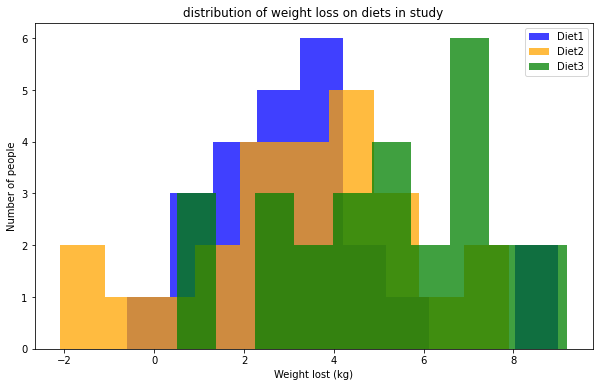

In [84]:
fig, ax = plt.subplots()

ax.hist(dfdiet1['weight_lost'], bins=10, alpha = 0.75, label='Diet1',color='blue');
ax.hist(dfdiet2['weight_lost'], bins=10, alpha = 0.75, label='Diet2',color='orange');
ax.hist(dfdiet3['weight_lost'], bins=10, alpha = 0.75, label='Diet3',color='green');
plt.xlabel('Weight lost (kg)')
plt.ylabel('Number of people')
plt.title('distribution of weight loss on diets in study')
plt.legend()
plt.show()


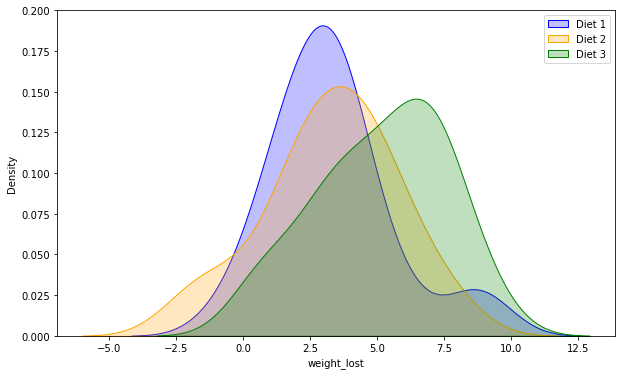

In [83]:
sns.kdeplot(dfdiet1['weight_lost'],color='blue', shade=True, label='Diet 1');
sns.kdeplot(dfdiet2['weight_lost'],color='orange', shade=True, label='Diet 2');
sns.kdeplot(dfdiet3['weight_lost'],color='green', shade=True, label='Diet 3');
plt.legend()
plt.show()

#### Paired t-test

Perform a paired t-test on each diet.

despite having cleaned up the data I have used the nan omit policy in order to ensure that any Nan values I have missed are ommitted for the calculation

In [87]:
ttest_rel(dfdiet1['pre.weight'],dfdiet1['weight6weeks'],nan_policy ='omit')

Ttest_relResult(statistic=7.216771317674052, pvalue=2.3967339414297313e-07)

In [89]:
ttest_rel(dfdiet2['pre.weight'],dfdiet2['weight6weeks'],nan_policy ='omit')

Ttest_relResult(statistic=6.630053635751579, pvalue=7.393920457261478e-07)

In [92]:
ttest_rel(dfdiet3['pre.weight'],dfdiet3['weight6weeks'],nan_policy ='omit')

Ttest_relResult(statistic=11.16668846353396, pvalue=2.030458889747232e-11)